# Introduction

Elections are multi-faceted events, and everything from campaigning to the vocabulary in candidate's speeches is carefully chosen. However, an often overlooked aspect of the election is whether or not a U.S. Citizen will actually complete the political process. Our project seeks to address this issue by simply asking whether or not a given person (based on a number of factors) will actually cast their ballot.



# Data Description and Cleaning

# Preregistration Statement

# Data Analysis

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.stats import binom, poisson, norm
from numpy import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from scipy.special import comb
import duckdb
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, \
 KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, \
 mean_absolute_percentage_error, accuracy_score, precision_score, \
 recall_score, f1_score, precision_recall_curve


### Hypothesis 1

In [303]:
demographics = pd.read_csv('data/election_demographics_final.csv', index_col=False)

columns = ['Presidential','PercentBachelors','PercentWhite','AverageAge']

x=demographics[columns]
model = sm.OLS(demographics['PercentVotingEligibleVotes'],x).fit()
print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.988
Model:                                    OLS   Adj. R-squared (uncentered):              0.988
Method:                         Least Squares   F-statistic:                              9539.
Date:                        Mon, 18 Nov 2024   Prob (F-statistic):                        0.00
Time:                                22:06:24   Log-Likelihood:                         -1508.0
No. Observations:                         469   AIC:                                      3024.
Df Residuals:                             465   BIC:                                      3041.
Df Model:                                   4                                                  
Covariance Type:                    nonrobust                                                  
                       coef    std err  

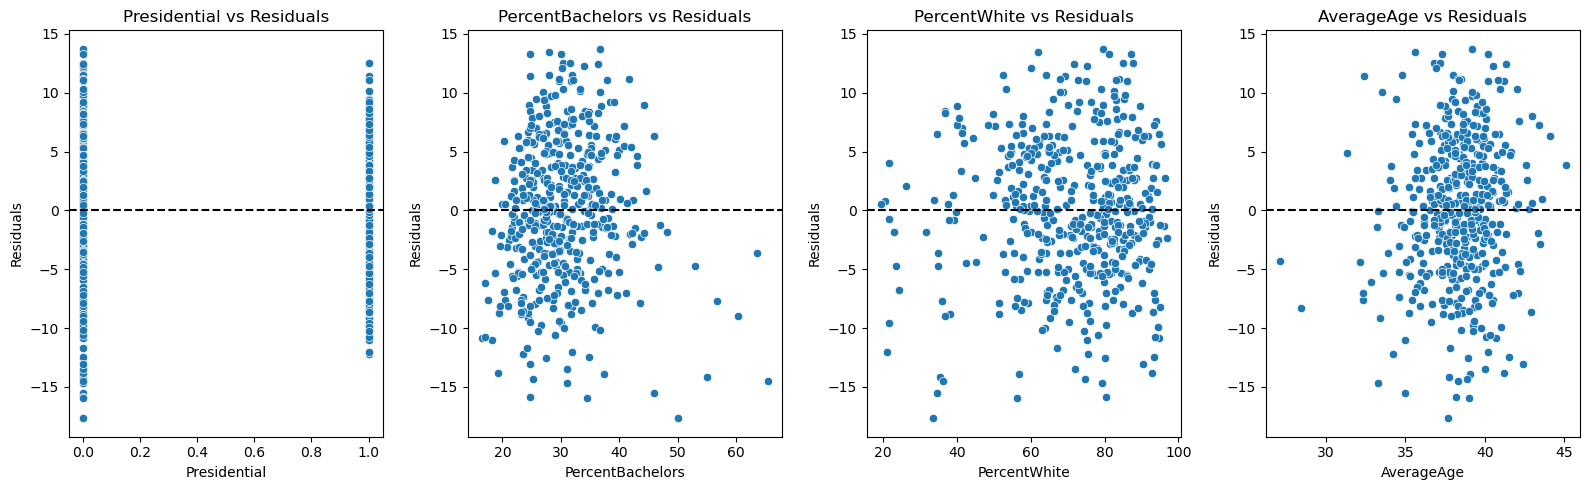

In [304]:
yhat = model.predict()
residuals = demographics['PercentVotingEligibleVotes'] - model.predict()

fig, axes = plt.subplots(1, len(columns), figsize=(16, 5)) 

for ax, x in zip(axes, columns):
    sns.scatterplot(ax=ax, x=demographics[x], y=residuals)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_title(f'{x} vs Residuals')
    ax.set_ylabel('Residuals')
plt.tight_layout()
plt.show()

In [305]:
demographics_train, demographics_test = train_test_split(demographics, test_size=0.3, random_state=2950)

input_vars = ['Presidential','PercentBachelors','PercentWhite','AverageAge']
model = LinearRegression().fit(demographics_train[input_vars], demographics_train['PercentVotingEligibleVotes'])

for var_name, var_coef in zip(input_vars, model.coef_):
   print(f'{var_name}: {var_coef:.5f}')

Presidential: 18.37946
PercentBachelors: 0.47236
PercentWhite: 0.19888
AverageAge: 0.71168


In [306]:
train_predictions = model.predict(demographics_train[input_vars])
test_predictions = model.predict(demographics_test[input_vars])

print(f"Train RMSE: {round(root_mean_squared_error(demographics_train['PercentVotingEligibleVotes'], train_predictions), 2)}")
print(f"Test RMSE: {round(root_mean_squared_error(demographics_test['PercentVotingEligibleVotes'], test_predictions), 2)}\n")

Train RMSE: 6.22
Test RMSE: 5.53



In [307]:
print(f"Train MAE: {round(mean_absolute_error(demographics_train['PercentVotingEligibleVotes'], train_predictions), 2)}")
print(f"Test MAE: {round(mean_absolute_error(demographics_test['PercentVotingEligibleVotes'], test_predictions), 2)}\n")

Train MAE: 4.97
Test MAE: 4.43



### Hypothesis 2

In [308]:
demographics_presidential = pd.read_csv('data/election_demographics_presidential.csv')
demographics_midterm = pd.read_csv('data/election_demographics_midterm.csv')

x=demographics_presidential['Year']
presidential_model = sm.OLS(demographics_presidential['PercentVotingEligibleVotes'],x).fit()
print(presidential_model.summary())

# sns.lmplot(demographics_presidential, x='Year',y='PercentVotingEligibleVotes')

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.988
Model:                                    OLS   Adj. R-squared (uncentered):              0.988
Method:                         Least Squares   F-statistic:                          2.226e+04
Date:                        Mon, 18 Nov 2024   Prob (F-statistic):                   1.10e-257
Time:                                22:06:24   Log-Likelihood:                         -889.27
No. Observations:                         266   AIC:                                      1781.
Df Residuals:                             265   BIC:                                      1784.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

In [309]:
x=demographics_midterm['Year']
midterm_model = sm.OLS(demographics_midterm['PercentVotingEligibleVotes'],x).fit()
print(midterm_model.summary())

# sns.lmplot(demographics_midterm, x='Year',y='PercentVotingEligibleVotes')

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.974
Model:                                    OLS   Adj. R-squared (uncentered):              0.973
Method:                         Least Squares   F-statistic:                          1.003e+04
Date:                        Mon, 18 Nov 2024   Prob (F-statistic):                   2.84e-217
Time:                                22:06:24   Log-Likelihood:                         -941.77
No. Observations:                         274   AIC:                                      1886.
Df Residuals:                             273   BIC:                                      1889.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

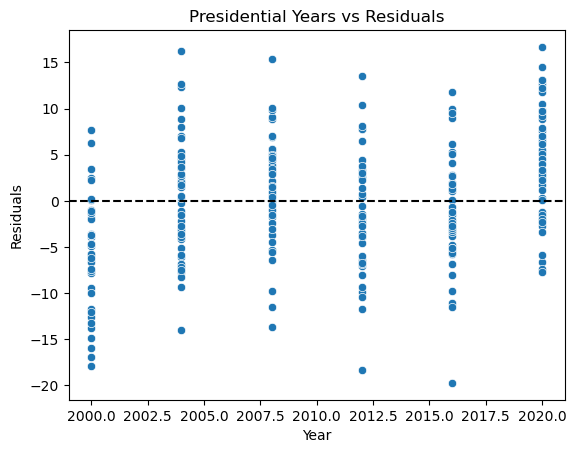

In [310]:
residuals = demographics_presidential['PercentVotingEligibleVotes'] - presidential_model.predict(demographics_presidential['Year'])
sns.scatterplot(x=demographics_presidential['Year'], y=residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Presidential Years vs Residuals')
plt.ylabel('Residuals')
plt.xlabel('Year')
plt.show()

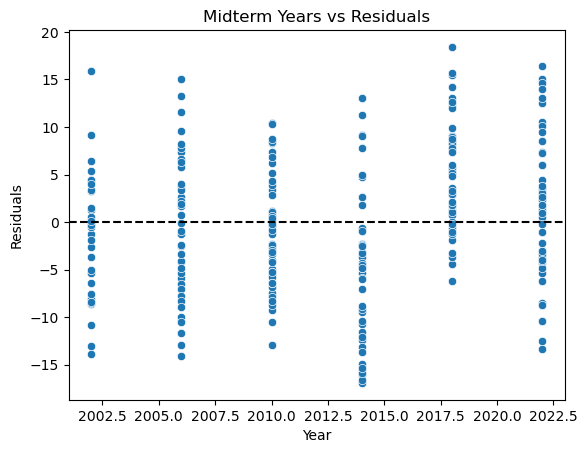

In [311]:
residuals = demographics_midterm['PercentVotingEligibleVotes'] - midterm_model.predict(demographics_midterm['Year'])
sns.scatterplot(x=demographics_midterm['Year'], y=residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Midterm Years vs Residuals')
plt.ylabel('Residuals')
plt.xlabel('Year')
plt.show()

# Evaluation of Significance

# Conclusions

# Limitations

# Acknowledgements and Bibliography